In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import set_config
set_config(display='diagram')

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.pipeline import make_pipeline

from sklearn.compose import make_column_transformer

from sklearn.metrics import mean_squared_error

from sklearn.feature_selection import SelectPercentile

# Informations générales sur le DF

In [2]:
df = pd.read_csv('data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Analyse rapide des données

In [3]:
def df_info(df):
        len_df = len(df)
        all_columns = len(df.columns)

        print(f"""
        Longueur du dataset : {len_df} enregistrements
        Nombre de colonnes : {all_columns}
        """)
        echantillonColonnes = []
        for i in df.columns:
            listcolumn = str(list(df[i].head(5)))
            echantillonColonnes.append(listcolumn)
        pd.set_option('max_rows', 81)
        obs = pd.DataFrame({'type': df.dtypes,
        'Echantillon': echantillonColonnes,
        'Nbr de V nulles' : df.isna().sum(),
        "% de valeurs nulles":round(df.isna().sum() / len_df * 100, 2),
        'Nbr L dupliquées' : (df.duplicated()).sum(),
        'Nbr V unique' : df.nunique(),
        })
        return obs.sort_values(by='type')

df_info(df)


        Longueur du dataset : 1460 enregistrements
        Nombre de colonnes : 81
        


,type,Echantillon,Nbr de V nulles,% de valeurs nulles,Nbr L dupliquées,Nbr V unique
Id,int64,"[1, 2, 3, 4, 5]",0,0.00,0,1460
BsmtUnfSF,int64,"[150, 284, 434, 540, 490]",0,0.00,0,780
TotalBsmtSF,int64,"[856, 1262, 920, 756, 1145]",0,0.00,0,721
1stFlrSF,int64,"[856, 1262, 920, 961, 1145]",0,0.00,0,753
2ndFlrSF,int64,"[854, 0, 866, 756, 1053]",0,0.00,0,417
LowQualFinSF,int64,"[0, 0, 0, 0, 0]",0,0.00,0,24
GrLivArea,int64,"[1710, 1262, 1786, 1717, 2198]",0,0.00,0,861
BsmtFullBath,int64,"[1, 0, 1, 1, 1]",0,0.00,0,4
BsmtHalfBath,int64,"[0, 1, 0, 0, 0]",0,0.00,0,3
FullBath,int64,"[2, 2, 2, 1, 2]",0,0.00,0,4


## % de chaque valeurs par variables

In [4]:
for col in df.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(df[col].value_counts()/1460*100)

----------------------------------------Id---------------------------------------- - 

1       0.068493
982     0.068493
980     0.068493
979     0.068493
978     0.068493
          ...   
485     0.068493
484     0.068493
483     0.068493
482     0.068493
1460    0.068493
Name: Id, Length: 1460, dtype: float64

----------------------------------------MSSubClass---------------------------------------- - 

20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64

----------------------------------------MSZoning---------------------------------------- - 

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64

----------------------------------------LotFrontage---------------------------------------- - 

60.0     9.794521
70.0     4.794521
80.0     4.726027
50.0     3.904110
75.0     3.630137
           ...   
112.0    0.068493
138.0    0.068493
149.0    0.068493
38.0     0.068493
111.0    0.068493
Name: LotFrontage, Length: 110, dtype: float64

----------------------------------------LotArea---------------------------------------- - 

7200     1.712329
9600     1.643836
6000     1.164384
8400     0.958904
9000     0.958904
           ...   
13031    0.068493
10991    0.068493
8944     0.068493
6897     0.068493
8190     0.068493
Name: LotArea, Length: 1073, dtype: float64

----------------------------------------Street---------------------------------------- - 

Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64

----------------------------------------Alley---------------------------------------- - 

Grvl    3.424658
Pave    2.808219
Name: Alley, dtype: float64

----------------------------------------LotShape---------------------------------------- - 

Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64

----------------------------------------LandContour---------------------------------------- - 

Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64

----------------------------------------Utilities---------------------------------------- - 

AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64

----------------------------------------LotConfig---------------------------------------- - 

Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64

----------------------------------------LandSlope---------------------------------------- - 

Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64

----------------------------------------Neighborhood---------------------------------------- - 

NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.972603
Crawfor     3.493151
Mitchel     3.356164
NoRidge     2.808219
Timber      2.602740
IDOTRR      2.534247
ClearCr     1.917808
StoneBr     1.712329
SWISU       1.712329
MeadowV     1.164384
Blmngtn     1.164384
BrDale      1.095890
Veenker     0.753425
NPkVill     0.616438
Blueste     0.136986
Name: Neighborhood, dtype: float64

----------------------------------------Condition1---------------------------------------- - 

Norm      86.301370
Feedr      5.547945
Artery     3.287671
RRAn       1.780822
PosN       1.301370
RRAe       0.753425
PosA       0.547945
RRNn       0.342466
RRNe       0.136986
Name: Condition1, dtype: float64

----------------------------------------Condition2---------------------------------------- - 

Norm      98.972603
Feedr      0.410959
Artery     0.136986
PosN       0.136986
RRNn       0.136986
RRAn       0.068493
PosA       0.068493
RRAe       0.068493
Name: Condition2, dtype: float64

----------------------------------------BldgType---------------------------------------- - 

1Fam      83.561644
TwnhsE     7.808219
Duplex     3.561644
Twnhs      2.945205
2fmCon     2.123288
Name: BldgType, dtype: float64

----------------------------------------HouseStyle---------------------------------------- - 

1Story    49.726027
2Story    30.479452
1.5Fin    10.547945
SLvl       4.452055
SFoyer     2.534247
1.5Unf     0.958904
2.5Unf     0.753425
2.5Fin     0.547945
Name: HouseStyle, dtype: float64

----------------------------------------OverallQual---------------------------------------- - 

5     27.191781
6     25.616438
7     21.849315
8     11.506849
4      7.945205
9      2.945205
3      1.369863
10     1.232877
2      0.205479
1      0.136986
Name: OverallQual, dtype: float64

----------------------------------------OverallCond---------------------------------------- - 

5    56.232877
6    17.260274
7    14.041096
8     4.931507
4     3.904110
3     1.712329
9     1.506849
2     0.342466
1     0.068493
Name: OverallCond, dtype: float64

----------------------------------------YearBuilt---------------------------------------- - 

2006    4.589041
2005    4.383562
2004    3.698630
2007    3.356164
2003    3.082192
          ...   
1904    0.068493
1898    0.068493
1893    0.068493
1882    0.068493
2010    0.068493
Name: YearBuilt, Length: 112, dtype: float64

----------------------------------------YearRemodAdd---------------------------------------- - 

1950    12.191781
2006     6.643836
2007     5.205479
2005     5.000000
2004     4.246575
2000     3.767123
2003     3.493151
2002     3.287671
2008     2.739726
1996     2.465753
1998     2.465753
1995     2.123288
1976     2.054795
1999     2.054795
1970     1.780822
1997     1.712329
1977     1.712329
2009     1.575342
1994     1.506849
2001     1.438356
1972     1.369863
1993     1.301370
1965     1.301370
1959     1.232877
1971     1.232877
1992     1.164384
1968     1.164384
1978     1.095890
1990     1.027397
1966     1.027397
1958     1.027397
1969     0.958904
1962     0.958904
1954     0.958904
1991     0.958904
1963     0.890411
1980     0.821918
1960     0.821918
1967     0.821918
1989     0.753425
1973     0.753425
1964     0.753425
1987     0.684932
1953     0.684932
1956     0.684932
1979     0.684932
1975     0.684932
1985     0.616438
1955     0.616438
1957     0.616438
1988     0.616438
1961     0.547945
1981     0.547945
1974     0.479452
1982     0.479452
1984     0

----------------------------------------RoofStyle---------------------------------------- - 

Gable      78.150685
Hip        19.589041
Flat        0.890411
Gambrel     0.753425
Mansard     0.479452
Shed        0.136986
Name: RoofStyle, dtype: float64

----------------------------------------RoofMatl---------------------------------------- - 

CompShg    98.219178
Tar&Grv     0.753425
WdShngl     0.410959
WdShake     0.342466
ClyTile     0.068493
Membran     0.068493
Roll        0.068493
Metal       0.068493
Name: RoofMatl, dtype: float64

----------------------------------------Exterior1st---------------------------------------- - 

VinylSd    35.273973
HdBoard    15.205479
MetalSd    15.068493
Wd Sdng    14.109589
Plywood     7.397260
CemntBd     4.178082
BrkFace     3.424658
WdShing     1.780822
Stucco      1.712329
AsbShng     1.369863
Stone       0.136986
BrkComm     0.136986
ImStucc     0.068493
AsphShn     0.068493
CBlock      0.068493
Name: Exterior1st, dtype: float64

----------------------------------------Exterior2nd---------------------------------------- - 

VinylSd    34.520548
MetalSd    14.657534
HdBoard    14.178082
Wd Sdng    13.493151
Plywood     9.726027
CmentBd     4.109589
Wd Shng     2.602740
Stucco      1.780822
BrkFace     1.712329
AsbShng     1.369863
ImStucc     0.684932
Brk Cmn     0.479452
Stone       0.342466
AsphShn     0.205479
Other       0.068493
CBlock      0.068493
Name: Exterior2nd, dtype: float64

----------------------------------------MasVnrType---------------------------------------- - 

None       59.178082
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: MasVnrType, dtype: float64

----------------------------------------MasVnrArea---------------------------------------- - 

0.0      58.972603
108.0     0.547945
72.0      0.547945
180.0     0.547945
16.0      0.479452
           ...    
31.0      0.068493
366.0     0.068493
528.0     0.068493
894.0     0.068493
415.0     0.068493
Name: MasVnrArea, Length: 327, dtype: float64

----------------------------------------ExterQual---------------------------------------- - 

TA    62.054795
Gd    33.424658
Ex     3.561644
Fa     0.958904
Name: ExterQual, dtype: float64

----------------------------------------ExterCond---------------------------------------- - 

TA    87.808219
Gd    10.000000
Fa     1.917808
Ex     0.205479
Po     0.068493
Name: ExterCond, dtype: float64

----------------------------------------Foundation---------------------------------------- - 

PConc     44.315068
CBlock    43.424658
BrkTil    10.000000
Slab       1.643836
Stone      0.410959
Wood       0.205479
Name: Foundation, dtype: float64

----------------------------------------BsmtQual---------------------------------------- - 

TA    44.452055
Gd    42.328767
Ex     8.287671
Fa     2.397260
Name: BsmtQual, dtype: float64

----------------------------------------BsmtCond---------------------------------------- - 

TA    89.794521
Gd     4.452055
Fa     3.082192
Po     0.136986
Name: BsmtCond, dtype: float64

----------------------------------------BsmtExposure---------------------------------------- - 

No    65.273973
Av    15.136986
Gd     9.178082
Mn     7.808219
Name: BsmtExposure, dtype: float64

----------------------------------------BsmtFinType1---------------------------------------- - 

Unf    29.452055
GLQ    28.630137
ALQ    15.068493
BLQ    10.136986
Rec     9.109589
LwQ     5.068493
Name: BsmtFinType1, dtype: float64

----------------------------------------BsmtFinSF1---------------------------------------- - 

0       31.986301
24       0.821918
16       0.616438
20       0.342466
686      0.342466
          ...    
535      0.068493
534      0.068493
532      0.068493
522      0.068493
2096     0.068493
Name: BsmtFinSF1, Length: 637, dtype: float64

----------------------------------------BsmtFinType2---------------------------------------- - 

Unf    86.027397
Rec     3.698630
LwQ     3.150685
BLQ     2.260274
ALQ     1.301370
GLQ     0.958904
Name: BsmtFinType2, dtype: float64

----------------------------------------BsmtFinSF2---------------------------------------- - 

0       88.561644
180      0.342466
374      0.205479
117      0.136986
391      0.136986
          ...    
215      0.068493
211      0.068493
210      0.068493
208      0.068493
1474     0.068493
Name: BsmtFinSF2, Length: 144, dtype: float64

----------------------------------------BsmtUnfSF---------------------------------------- - 

0       8.082192
728     0.616438
384     0.547945
572     0.479452
600     0.479452
          ...   
549     0.068493
548     0.068493
545     0.068493
543     0.068493
2046    0.068493
Name: BsmtUnfSF, Length: 780, dtype: float64

----------------------------------------TotalBsmtSF---------------------------------------- - 

0       2.534247
864     2.397260
672     1.164384
912     1.027397
1040    0.958904
          ...   
1210    0.068493
727     0.068493
1205    0.068493
1203    0.068493
2046    0.068493
Name: TotalBsmtSF, Length: 721, dtype: float64

----------------------------------------Heating---------------------------------------- - 

GasA     97.808219
GasW      1.232877
Grav      0.479452
Wall      0.273973
OthW      0.136986
Floor     0.068493
Name: Heating, dtype: float64

----------------------------------------HeatingQC---------------------------------------- - 

Ex    50.753425
TA    29.315068
Gd    16.506849
Fa     3.356164
Po     0.068493
Name: HeatingQC, dtype: float64

----------------------------------------CentralAir---------------------------------------- - 

Y    93.493151
N     6.506849
Name: CentralAir, dtype: float64

----------------------------------------Electrical---------------------------------------- - 

SBrkr    91.369863
FuseA     6.438356
FuseF     1.849315
FuseP     0.205479
Mix       0.068493
Name: Electrical, dtype: float64

----------------------------------------1stFlrSF---------------------------------------- - 

864     1.712329
1040    1.095890
912     0.958904
848     0.821918
894     0.821918
          ...   
1061    0.068493
1058    0.068493
1051    0.068493
1047    0.068493
2046    0.068493
Name: 1stFlrSF, Length: 753, dtype: float64

----------------------------------------2ndFlrSF---------------------------------------- - 

0       56.780822
728      0.684932
504      0.616438
672      0.547945
546      0.547945
          ...    
812      0.068493
811      0.068493
473      0.068493
475      0.068493
1872     0.068493
Name: 2ndFlrSF, Length: 417, dtype: float64

----------------------------------------LowQualFinSF---------------------------------------- - 

0      98.219178
80      0.205479
360     0.136986
392     0.068493
528     0.068493
515     0.068493
514     0.068493
513     0.068493
481     0.068493
479     0.068493
473     0.068493
420     0.068493
397     0.068493
390     0.068493
53      0.068493
384     0.068493
371     0.068493
234     0.068493
232     0.068493
205     0.068493
156     0.068493
144     0.068493
120     0.068493
572     0.068493
Name: LowQualFinSF, dtype: float64

----------------------------------------GrLivArea---------------------------------------- - 

864     1.506849
1040    0.958904
894     0.753425
848     0.684932
1456    0.684932
          ...   
2792    0.068493
2794    0.068493
1349    0.068493
1347    0.068493
2054    0.068493
Name: GrLivArea, Length: 861, dtype: float64

----------------------------------------BsmtFullBath---------------------------------------- - 

0    58.630137
1    40.273973
2     1.027397
3     0.068493
Name: BsmtFullBath, dtype: float64

----------------------------------------BsmtHalfBath---------------------------------------- - 

0    94.383562
1     5.479452
2     0.136986
Name: BsmtHalfBath, dtype: float64

----------------------------------------FullBath---------------------------------------- - 

2    52.602740
1    44.520548
3     2.260274
0     0.616438
Name: FullBath, dtype: float64

----------------------------------------HalfBath---------------------------------------- - 

0    62.534247
1    36.643836
2     0.821918
Name: HalfBath, dtype: float64

----------------------------------------BedroomAbvGr---------------------------------------- - 

3    55.068493
2    24.520548
4    14.589041
1     3.424658
5     1.438356
6     0.479452
0     0.410959
8     0.068493
Name: BedroomAbvGr, dtype: float64

----------------------------------------KitchenAbvGr---------------------------------------- - 

1    95.342466
2     4.452055
3     0.136986
0     0.068493
Name: KitchenAbvGr, dtype: float64

----------------------------------------KitchenQual---------------------------------------- - 

TA    50.342466
Gd    40.136986
Ex     6.849315
Fa     2.671233
Name: KitchenQual, dtype: float64

----------------------------------------TotRmsAbvGrd---------------------------------------- - 

6     27.534247
7     22.534247
5     18.835616
8     12.808219
4      6.643836
9      5.136986
10     3.219178
11     1.232877
3      1.164384
12     0.753425
2      0.068493
14     0.068493
Name: TotRmsAbvGrd, dtype: float64

----------------------------------------Functional---------------------------------------- - 

Typ     93.150685
Min2     2.328767
Min1     2.123288
Mod      1.027397
Maj1     0.958904
Maj2     0.342466
Sev      0.068493
Name: Functional, dtype: float64

----------------------------------------Fireplaces---------------------------------------- - 

0    47.260274
1    44.520548
2     7.876712
3     0.342466
Name: Fireplaces, dtype: float64

----------------------------------------FireplaceQu---------------------------------------- - 

Gd    26.027397
TA    21.438356
Fa     2.260274
Ex     1.643836
Po     1.369863
Name: FireplaceQu, dtype: float64

----------------------------------------GarageType---------------------------------------- - 

Attchd     59.589041
Detchd     26.506849
BuiltIn     6.027397
Basment     1.301370
CarPort     0.616438
2Types      0.410959
Name: GarageType, dtype: float64

----------------------------------------GarageYrBlt---------------------------------------- - 

2005.0    4.452055
2006.0    4.041096
2004.0    3.630137
2003.0    3.424658
2007.0    3.356164
            ...   
1906.0    0.068493
1908.0    0.068493
1933.0    0.068493
1900.0    0.068493
1927.0    0.068493
Name: GarageYrBlt, Length: 97, dtype: float64

----------------------------------------GarageFinish---------------------------------------- - 

Unf    41.438356
RFn    28.904110
Fin    24.109589
Name: GarageFinish, dtype: float64

----------------------------------------GarageCars---------------------------------------- - 

2    56.438356
1    25.273973
3    12.397260
0     5.547945
4     0.342466
Name: GarageCars, dtype: float64

----------------------------------------GarageArea---------------------------------------- - 

0       5.547945
440     3.356164
576     3.219178
240     2.602740
484     2.328767
          ...   
671     0.068493
342     0.068493
673     0.068493
675     0.068493
1418    0.068493
Name: GarageArea, Length: 441, dtype: float64

----------------------------------------GarageQual---------------------------------------- - 

TA    89.794521
Fa     3.287671
Gd     0.958904
Po     0.205479
Ex     0.205479
Name: GarageQual, dtype: float64

----------------------------------------GarageCond---------------------------------------- - 

TA    90.821918
Fa     2.397260
Gd     0.616438
Po     0.479452
Ex     0.136986
Name: GarageCond, dtype: float64

----------------------------------------PavedDrive---------------------------------------- - 

Y    91.780822
N     6.164384
P     2.054795
Name: PavedDrive, dtype: float64

----------------------------------------WoodDeckSF---------------------------------------- - 

0      52.123288
192     2.602740
100     2.465753
144     2.260274
120     2.123288
         ...    
103     0.068493
269     0.068493
98      0.068493
97      0.068493
857     0.068493
Name: WoodDeckSF, Length: 274, dtype: float64

----------------------------------------OpenPorchSF---------------------------------------- - 

0      44.931507
36      1.986301
48      1.506849
20      1.438356
45      1.301370
         ...    
141     0.068493
137     0.068493
135     0.068493
134     0.068493
547     0.068493
Name: OpenPorchSF, Length: 202, dtype: float64

----------------------------------------EnclosedPorch---------------------------------------- - 

0      85.753425
112     1.027397
96      0.410959
120     0.342466
192     0.342466
         ...    
170     0.068493
169     0.068493
67      0.068493
68      0.068493
552     0.068493
Name: EnclosedPorch, Length: 120, dtype: float64

----------------------------------------3SsnPorch---------------------------------------- - 

0      98.356164
168     0.205479
216     0.136986
144     0.136986
180     0.136986
407     0.068493
320     0.068493
304     0.068493
290     0.068493
245     0.068493
238     0.068493
182     0.068493
196     0.068493
23      0.068493
162     0.068493
153     0.068493
140     0.068493
130     0.068493
96      0.068493
508     0.068493
Name: 3SsnPorch, dtype: float64

----------------------------------------ScreenPorch---------------------------------------- - 

0      92.054795
192     0.410959
120     0.342466
224     0.342466
180     0.273973
189     0.273973
90      0.205479
144     0.205479
168     0.205479
160     0.205479
126     0.205479
147     0.205479
216     0.136986
184     0.136986
176     0.136986
170     0.136986
259     0.136986
200     0.136986
198     0.136986
100     0.136986
288     0.136986
142     0.136986
271     0.068493
204     0.068493
440     0.068493
210     0.068493
410     0.068493
396     0.068493
385     0.068493
220     0.068493
374     0.068493
222     0.068493
322     0.068493
291     0.068493
312     0.068493
225     0.068493
233     0.068493
234     0.068493
252     0.068493
287     0.068493
260     0.068493
263     0.068493
276     0.068493
273     0.068493
266     0.068493
265     0.068493
182     0.068493
197     0.068493
143     0.068493
53      0.068493
60      0.068493
63      0.068493
80      0.068493
95      0.068493
99      0.068493
116     0.068493
119     0.068493
122     0.068493
128     0.0684

----------------------------------------PoolArea---------------------------------------- - 

0      99.520548
480     0.068493
512     0.068493
519     0.068493
555     0.068493
576     0.068493
648     0.068493
738     0.068493
Name: PoolArea, dtype: float64

----------------------------------------PoolQC---------------------------------------- - 

Gd    0.205479
Ex    0.136986
Fa    0.136986
Name: PoolQC, dtype: float64

----------------------------------------Fence---------------------------------------- - 

MnPrv    10.753425
GdPrv     4.041096
GdWo      3.698630
MnWw      0.753425
Name: Fence, dtype: float64

----------------------------------------MiscFeature---------------------------------------- - 

Shed    3.356164
Gar2    0.136986
Othr    0.136986
TenC    0.068493
Name: MiscFeature, dtype: float64

----------------------------------------MiscVal---------------------------------------- - 

0        96.438356
400       0.753425
500       0.547945
700       0.342466
450       0.273973
600       0.273973
2000      0.273973
480       0.136986
1200      0.136986
2500      0.068493
350       0.068493
560       0.068493
54        0.068493
620       0.068493
8300      0.068493
800       0.068493
1150      0.068493
15500     0.068493
1300      0.068493
1400      0.068493
3500      0.068493
Name: MiscVal, dtype: float64

----------------------------------------MoSold---------------------------------------- - 

6     17.328767
7     16.027397
5     13.972603
4      9.657534
8      8.356164
3      7.260274
10     6.095890
11     5.410959
9      4.315068
12     4.041096
1      3.972603
2      3.561644
Name: MoSold, dtype: float64

----------------------------------------YrSold---------------------------------------- - 

2009    23.150685
2007    22.534247
2006    21.506849
2008    20.821918
2010    11.986301
Name: YrSold, dtype: float64

----------------------------------------SaleType---------------------------------------- - 

WD       86.780822
New       8.356164
COD       2.945205
ConLD     0.616438
ConLw     0.342466
ConLI     0.342466
CWD       0.273973
Oth       0.205479
Con       0.136986
Name: SaleType, dtype: float64

----------------------------------------SaleCondition---------------------------------------- - 

Normal     82.054795
Partial     8.561644
Abnorml     6.917808
Family      1.369863
Alloca      0.821918
AdjLand     0.273973
Name: SaleCondition, dtype: float64

----------------------------------------SalePrice---------------------------------------- - 

140000    1.369863
135000    1.164384
155000    0.958904
145000    0.958904
190000    0.890411
            ...   
337000    0.068493
412500    0.068493
306000    0.068493
195400    0.068493
206000    0.068493
Name: SalePrice, Length: 663, dtype: float64

## Describe du DF et heatmap des variables numériques

In [5]:
df = df.drop(columns=['Id'])

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


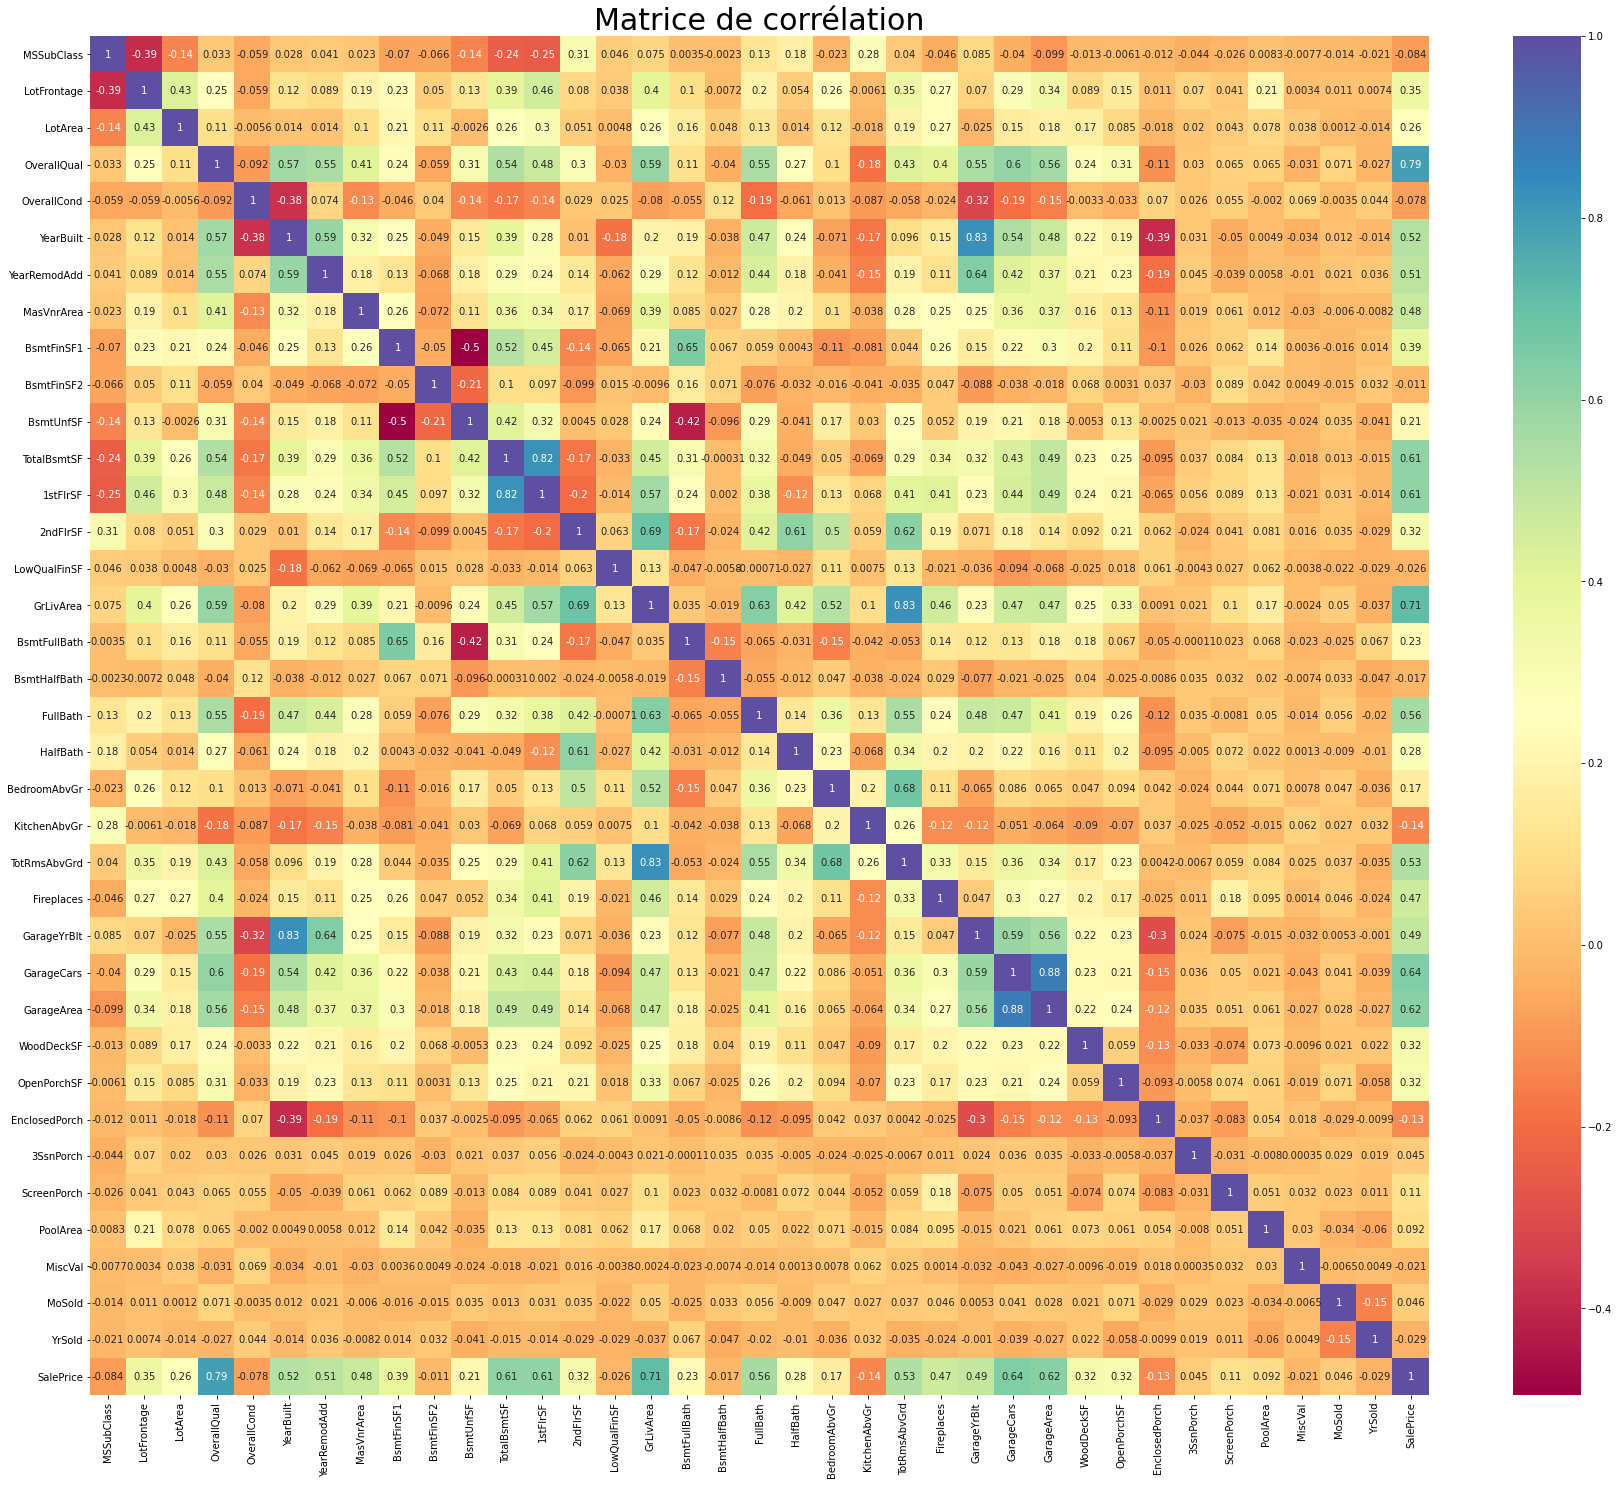

In [7]:
plt.subplots(figsize=(30,25))
sns.heatmap(df.corr(), annot=True, cmap='Spectral').set_title('Matrice de corrélation', fontsize=30);

In [8]:
# df[['SalePrice', 'Neighborhood']].groupby('Neighborhood').mean().sort_values(by='SalePrice')
# df['Neighborhood'].value_counts()

# Train-test-split et preprocessing

In [9]:
from sklearn.linear_model import SGDRegressor
X = df.drop(['SalePrice', 'LotFrontage', 'Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis=1)
y = np.log(df['SalePrice'])

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (1168, 73)
Test set: (292, 73)


In [10]:
# Transformation de variables numériques en variables catégorielles
X['OverallQual'] = X['OverallQual'].astype('object')
X['GarageCars'] = X['GarageCars'].astype('object')
X['Fireplaces'] = X['Fireplaces'].astype('object')

## Sélection des variables numériques

In [11]:
# Sélection des variables numériques
num_features = X.select_dtypes(include=np.number).columns.values
num_features

array(['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'], dtype=object)

## Sélection des variables catégorielles - ordinales et non ordinales

In [12]:
# Sélection des variables catégorielles 
cat_features = X.select_dtypes(exclude=np.number).columns.values
cat_features

array(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'Fireplaces', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'], dtype=object)

In [13]:
# Variables non ordinales
non_ordinal_features = X[['MSZoning', 'LandContour', 'LotConfig', 'Condition1', 'BldgType', 'HouseStyle', 
                          'RoofStyle', 'MasVnrType', 'Foundation', 'CentralAir', 'Electrical', 'GarageType', 
                          'GarageFinish', 'PavedDrive', 'OverallQual', 'GarageCars', 'Fireplaces']].columns.values

# Variables ordinales
ordinal_features = X[['Neighborhood', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                      'KitchenQual', 'Exterior1st', 'SaleType', 'HeatingQC', 'GarageQual']].columns.values


In [14]:
# Paramètres pour catégories ordinales
params_ordinal = [['MeadowV', 'IDOTRR', 'BrDale', 'BrkSide', 'Edwards', 'OldTown', 'Sawyer', 'Blueste', 'SWISU', 'NPkVill',
                   'NAmes', 'Mitchel', 'SawyerW', 'NWAmes', 'Gilbert', 'Blmngtn', 'CollgCr', 'Crawfor', 'ClearCr', 'Somerst',
                   'Veenker', 'Timber', 'StoneBr', 'NridgHt', 'NoRidge'],
                  ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                  ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                  ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                  ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                  ['NA', 'No', 'Mn', 'Av', 'Gd'],
                  ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                  ['BrkComm', 'AsphShn', 'CBlock', 'AsbShng', 'MetalSd', 'Wd Sdng', 'WdShing', 'Stucco', 'HdBoard', 'Plywood',
                   'BrkFace', 'VinylSd', 'CemntBd', 'Stone', 'ImStucc'],
                  ['Oth', 'ConLD', 'ConLw', 'COD', 'WD', 'ConLI', 'CWD', 'Con', 'New'],
                  ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                  ['Po', 'Fa', 'TA', 'Gd', 'Ex']
                 ]

## Création pipelines : preprocessing, features selection et stacking

In [15]:
# Pipelines de transformations des données numériques et catégorielles

num_pipeline = make_pipeline(SimpleImputer(), RobustScaler())

non_ordinal_pipeline = make_pipeline(SimpleImputer(
    strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))

ordinal_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(
    categories=params_ordinal, handle_unknown='use_encoded_value', unknown_value=-1))

In [16]:
# Application des pipelines de transformations aux données sélectionnées
preprocessor = make_column_transformer((num_pipeline, num_features),
                                      (non_ordinal_pipeline, non_ordinal_features),
                                      (ordinal_pipeline, ordinal_features))

In [17]:
# Features sélection avec SelectPercentile()
from sklearn.feature_selection import SelectPercentile, f_regression
features_selection = SelectPercentile(f_regression, percentile=50)

In [18]:
# Stacking avec 6 modèles de régression linéaire
from sklearn.ensemble import StackingRegressor

model_1 = LassoCV()
model_2 = RidgeCV()
model_3 = ElasticNetCV()
model_4 = RandomForestRegressor(random_state=42)
model_5 = SVR(kernel='linear')
model_6 = GradientBoostingRegressor(random_state=42)

stack_reg = StackingRegressor([('LassoCV', model_1),
                               ('RidgeCV', model_2),
                               ('ElacticNetCV', model_3), 
                               ('RandomForest', model_4),
                               ('SVR', model_5),
                               ('Gradient', model_6)],
                               final_estimator = model_5)

In [19]:
# Pipeline finale = modèle final avec preprocessing, features selection et stacking
model = make_pipeline(preprocessor, features_selection, stack_reg)
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  array(['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea...
                                  score_func=<function f_regression at 0x0000027B9DD59160>)),
                ('stackingregressor',
                 StackingRegressor(estimators=[('LassoCV', LassoCV()),
                                               ('RidgeCV',
                                                RidgeCV(alphas=array([ 0.1,  1. , 10. ]))),
                                               ('ElacticNetCV', ElasticNetCV()),
                                               ('RandomForest',
                                                RandomForestRegressor(random_state=42)),
                                               ('SVR', SVR(kernel='linear')),
                                               ('Gradient',
                                                GradientBoostingRegressor(random_state=42))],
                                   final_estimator=SVR(kernel='linear')))])

In [20]:
# Création de la métrique de performance
from sklearn.metrics import make_scorer

def custom_metric(y, y_pred):
    return mean_squared_error(y, y_pred, squared=False)

custom_score = make_scorer(custom_metric, greater_is_better = False)

In [21]:
#params = {
    #'randomforestregressor__ccp_alpha': np.arange(0.0, 1.1, 0.1),
    #'randomforestregressor__criterion': ['mse', 'mae'],
    #'randomforestregressor__max_depth': np.arange(2, 11, 1),
    #'randomforestregressor__max_features': ['auto', 'sqrt', 'log2'],
    #'randomforestregressor__max_leaf_nodes': np.arange(2, 11, 1),
    #'randomforestregressor__warm_start': [False, True]
    #}

#grid = RandomizedSearchCV(model, params, cv=3, scoring=custom_score, n_iter=50)
#grid.fit(X, y)
#grid.best_params_

In [22]:
#model = grid.best_estimator_
#grid.best_score_

# Entrainement du modèle

In [23]:
# Entrainement du modèle et cross_val_score (métrique personnelle) sur données d'entrainement 
model.fit(X_train, y_train)
cross_val_score(model, X_train, y_train, cv=5, scoring=custom_score).mean()

-0.14110392170423292

In [24]:
# R2 sur données d'entrainement
model.score(X_train, y_train)

0.9292746076294348

In [25]:
# R2 sur données de test
model.score(X_test, y_test)

0.9011050434570211

In [26]:
# Prédiction sur données de test
prediction = model.predict(X_test)

In [27]:
# Calcul de la RMSE sur les target logarithmées
rmsel = mean_squared_error(y_test, prediction, squared=False)
rmsel

0.12901709984512585

In [28]:
# Entrainement du modèle sur toutes les données de train.csv
model.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  array(['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea...
                                  score_func=<function f_regression at 0x0000027B9DD59160>)),
                ('stackingregressor',
                 StackingRegressor(estimators=[('LassoCV', LassoCV()),
                                               ('RidgeCV',
                                                RidgeCV(alphas=array([ 0.1,  1. , 10. ]))),
                                               ('ElacticNetCV', ElasticNetCV()),
                                               ('RandomForest',
                                                RandomForestRegressor(random_state=42)),
                                               ('SVR', SVR(kernel='linear')),
                                               ('Gradient',
                                                GradientBoostingRegressor(random_state=42))],
                                   final_estimator=SVR(kernel='linear')))])

# Prédiction pour soumission Kaggle

In [29]:
# Récupération du test.csv et prédiction grâce à notre modèle entrainé sur le train.csv

X_test = pd.read_csv('data/test.csv').drop(columns=['Id', 'LotFrontage', 'Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'])

prediction = model.predict(X_test)
y_pred = np.exp(prediction)

In [30]:
# Préparation et exportation nouveau csv à soumettre

ids = pd.read_csv('data/test.csv')['Id']

submit_df = pd.concat([ids, pd.DataFrame(y_pred)], axis=1)
submit_df.columns = ['Id', 'SalePrice']

submit_df.to_csv('y_pred.csv', index=False)

submit_df

,Id,SalePrice
0,1461,125148.183237
1,1462,155041.739502
2,1463,179034.444189
3,1464,184045.709765
4,1465,189984.362458
...,...,...
1454,2915,79659.368975
1455,2916,86209.656370
1456,2917,164669.127309
1457,2918,114770.288059


**Meilleur résultat obtenu : 0.13099**